# Output Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

directory = '../output/'
stress_data = []
coord_data = []
stress_filenames = []
coord_filenames = []

for filename in os.listdir(directory):
    # stress
    if filename.startswith('S') and filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        mises_stress = df['Mises'][:581]
        stress_data.append(mises_stress.tolist())
        stress_filenames.append(filename.split('.')[0])
    
    # coord
    if filename.startswith('COORD') and filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        coords = df.loc[pd.notnull(df['Element Label'])][['Element Label','x', 'y', 'z']].iloc[32:].values.tolist()
        coord_data.append(coords)
        coord_filenames.append(filename.split('.')[0])
        

stress_df = pd.DataFrame(stress_data)
stress_df['Filename'] = stress_filenames
stress_df['Parameters'] = stress_df['Filename'].str.split('S_').str[1]
stress_df.reset_index(drop=True, inplace=True)

stress_df = pd.DataFrame({
    'Mises': stress_df.apply(lambda row: row[:581].tolist(), axis=1),
    'Parameters': stress_df.iloc[:, 582]
    })

coord_df = pd.DataFrame({'Coordinates': coord_data, 'Filename': coord_filenames})
coord_df['Parameters'] = coord_df['Filename'].str.split('COORD_').str[1]
coord_df

,Coordinates,Filename,Parameters
0,"[[1.0, -0.04473915, 0.08004976, 0.0061563933],...",COORD_001_Sim_Clr0p0039_Spdm1p9_Thk0p011,001_Sim_Clr0p0039_Spdm1p9_Thk0p011
1,"[[1.0, -0.038193885, 0.07521964, 0.009228542],...",COORD_002_Sim_Clr0p0000_Spdm0p7_Thk0p015,002_Sim_Clr0p0000_Spdm0p7_Thk0p015
2,"[[1.0, -0.04256461, 0.07431078, -0.0056484398]...",COORD_003_Sim_Clr0p0023_Spdm0p9_Thk0p012,003_Sim_Clr0p0023_Spdm0p9_Thk0p012
3,"[[1.0, -0.04128364, 0.065596074, 0.00793797], ...",COORD_004_Sim_Clr0p0030_Spdm0p4_Thk0p007,004_Sim_Clr0p0030_Spdm0p4_Thk0p007
4,"[[1.0, -0.042019587, 0.073589824, 0.007951141]...",COORD_005_Sim_Clr0p0061_Spdm0p2_Thk0p008,005_Sim_Clr0p0061_Spdm0p2_Thk0p008
...,...,...,...
486,"[[1.0, -0.048961576, 0.07056775, -0.004649625]...",COORD_496_Sim_Clr0p0070_Spdm1p0_Thk0p006,496_Sim_Clr0p0070_Spdm1p0_Thk0p006
487,"[[1.0, -0.043540776, 0.08089302, 0.0047370624]...",COORD_497_Sim_Clr0p0030_Spdm0p6_Thk0p009,497_Sim_Clr0p0030_Spdm0p6_Thk0p009
488,"[[1.0, -0.042725135, 0.078214295, -0.006413277...",COORD_498_Sim_Clr0p0032_Spdm1p5_Thk0p015,498_Sim_Clr0p0032_Spdm1p5_Thk0p015
489,"[[1.0, -0.043333225, 0.08000017, 0.0004749205]...",COORD_499_Sim_Clr0p0038_Spdm0p3_Thk0p001,499_Sim_Clr0p0038_Spdm0p3_Thk0p001


In [3]:
merged_df = pd.merge(stress_df, coord_df, on='Parameters')
merged_df.drop(columns=['Filename'], inplace=True)
merged_df

,Mises,Parameters,Coordinates
0,"[18255.33203125, 37100.46484375, 37281.4023437...",001_Sim_Clr0p0039_Spdm1p9_Thk0p011,"[[1.0, -0.04473915, 0.08004976, 0.0061563933],..."
1,"[2037.44384765625, 4167.60888671875, 4308.6215...",002_Sim_Clr0p0000_Spdm0p7_Thk0p015,"[[1.0, -0.038193885, 0.07521964, 0.009228542],..."
2,"[16578.55859375, 24921.77734375, 18578.8085937...",003_Sim_Clr0p0023_Spdm0p9_Thk0p012,"[[1.0, -0.04256461, 0.07431078, -0.0056484398]..."
3,"[4058.21020507813, 3295.79467773438, 4205.0820...",004_Sim_Clr0p0030_Spdm0p4_Thk0p007,"[[1.0, -0.04128364, 0.065596074, 0.00793797], ..."
4,"[2580.05224609375, 3026.36157226563, 2583.2705...",005_Sim_Clr0p0061_Spdm0p2_Thk0p008,"[[1.0, -0.042019587, 0.073589824, 0.007951141]..."
...,...,...,...
486,"[16869.2109375, 14011.1767578125, 16154.898437...",496_Sim_Clr0p0070_Spdm1p0_Thk0p006,"[[1.0, -0.048961576, 0.07056775, -0.004649625]..."
487,"[16065.20703125, 22129.77734375, 21189.1484375...",497_Sim_Clr0p0030_Spdm0p6_Thk0p009,"[[1.0, -0.043540776, 0.08089302, 0.0047370624]..."
488,"[18065.408203125, 18207.2421875, 19188.1328125...",498_Sim_Clr0p0032_Spdm1p5_Thk0p015,"[[1.0, -0.042725135, 0.078214295, -0.006413277..."
489,"[3766.6865234375, 5692.06201171875, 2577.50146...",499_Sim_Clr0p0038_Spdm0p3_Thk0p001,"[[1.0, -0.043333225, 0.08000017, 0.0004749205]..."


### View sample distress distribution

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interactive

row = merged_df.iloc[50]
mises = np.array(row['Mises']).reshape(-1, 1) 
mises = np.nan_to_num(mises, nan=0)
coordinates = np.array(row['Coordinates'])

if len(coordinates) > 581:
    coordinates = coordinates[:581]
elif len(coordinates) < 581:
    padding_length = 581 - len(coordinates)
    last_index = len(coordinates)    
    padding_indexes = np.arange(last_index + 1, last_index + padding_length + 1).reshape(-1, 1)
    padding_zeros = np.zeros((padding_length, coordinates.shape[1] - 1))
    coordinates = np.vstack((coordinates, np.hstack((padding_indexes, padding_zeros))))

stress_normalized = mises / np.max(mises)
cmap = matplotlib.cm.jet

# static plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(coordinates[:,1], coordinates[:,2], coordinates[:,3], c=stress_normalized, cmap=cmap)

# cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
# cbar.set_label('Normalized Mises Stress')

# ax.set(xlabel='x', ylabel='y', zlabel='z', zlim=[0.001, 0.002])
# ax.set_title('Mises Stress Distribution')
# plt.show()


# interactive plot
def plot_3d(elev=30, azim=30):
    fig = plt.figure(figsize=(11, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatterplot = ax.scatter(coordinates[:,1], coordinates[:,2], coordinates[:,3], c=stress_normalized, cmap=cmap)
    ax.set(xlabel='x', ylabel='y', zlabel='z', zlim=[0.0012, 0.002])
    ax.set_title('Mises Stress Distribution')
    plt.colorbar(scatterplot, ax=ax, shrink=0.5, aspect=10)
    ax.view_init(elev=elev, azim=azim)
    plt.show()

interactive_plot = interactive(plot_3d, elev=(-90, 90), azim=(-90, 90))
output = interactive_plot.children[-1]
output.layout.height = '450px' 
interactive_plot

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

In [4]:
# # define x- and y- range
# x_min = -0.15
# x_max = 0.15
# y_min = -0.05 # 1/4 is 0.0625
# y_max = 0.05

# row = merged_df.iloc[14]
# coordinates = np.array(row['Coordinates'])
# mises = np.array(row['Mises']).reshape(-1, 1) 
# results = np.concatenate((coordinates, mises), axis=1)
# print(coordinates.shape, mises.shape)

# positive_x = results[(results[:,2] >= y_min) & (results[:,2] <= y_max) & (results[:,1] > 0)]
# negative_x = results[(results[:,2] >= y_min) & (results[:,2] <= y_max) & (results[:,1] < 0)]
# # print(positive_x.shape, negative_x.shape)

# top_positive_indices = np.argsort(positive_x[:, 4])[-10:]
# top_negative_indices = np.argsort(negative_x[:, 4])[-10:]

# top_positive_coords = positive_x[top_positive_indices, 1:4]
# top_negative_coords = negative_x[top_negative_indices, 1:4]

# print(top_positive_coords[:,1])
# print(top_negative_coords[:,1])

# # Manhattan distances along the x-axis only
# # x_distances = [(top_positive_coords[i,1] - top_negative_coords[i,1]) for i in range(10)]
# # average_x_distance = sum(x_distances) / len(x_distances)
# average_x_distance = np.mean(top_positive_coords[:,1]) - np.mean(top_negative_coords[:,1])
# print(f'Average x-distance: {average_x_distance}')

# from scipy.spatial.distance import euclidean
# # average Euclidean distance between x,y,z coordinate pairs
# distances = [euclidean(top_positive_coords[i], top_negative_coords[i]) for i in range(10)]
# average_distance = sum(distances) / len(distances)
# print(f'Average Eucliean distance = {average_distance}')

### Calculate punched width

In [16]:
from scipy.spatial.distance import euclidean

# define x- and y- range
x_min = -0.15
x_max = 0.15
y_min = -0.05 # 1/4 is 0.0625
y_max = 0.05

results = []

for index, row in merged_df.iterrows():
    coordinates = np.array(row['Coordinates'])
    mises = np.array(row['Mises']).reshape(-1, 1) 
    # print(index, coordinates.shape, mises.shape)

    # pad arrays for broadcasting
    max_rows = max(coordinates.shape[0], mises.shape[0])
    coordinates = np.pad(coordinates, ((0, max_rows - coordinates.shape[0]), (0, 0)), mode='constant')
    mises = np.pad(mises, ((0, max_rows - mises.shape[0]), (0, 0)), mode='constant')
    
    concat = np.concatenate((coordinates, mises), axis=1)
    
    # filter for positive and negative x within y-range
    positive_x = concat[(concat[:,2] >= y_min) & (concat[:,2] <= y_max) & (concat[:,1] > 0)]
    negative_x = concat[(concat[:,2] >= y_min) & (concat[:,2] <= y_max) & (concat[:,1] < 0)]       
        
    # sort by mises and select top 10 
    top_positive_indices = np.argsort(positive_x[:, 4])[-10:]
    top_negative_indices = np.argsort(negative_x[:, 4])[-10:]    
        
    # get coordinates of top 10 results
    top_positive_coords = positive_x[top_positive_indices, 1:4]
    top_negative_coords = negative_x[top_negative_indices, 1:4]
            
    # Manhattan distances, x-axis only
    average_x_distance = np.mean(top_positive_coords[:,0]) - np.mean(top_negative_coords[:,0])
    
    # average Euclidean distance between x,y,z coord pairs
    distances = [euclidean(top_positive_coords[i], top_negative_coords[i]) for i in range(10)]
    average_eucliean_distance = sum(distances) / len(distances)
    
    results.append({
        'Parameters': row['Parameters'],
        'x-distance': average_x_distance,
        'pos-x': np.mean(top_positive_coords[:,0]),
        'neg-x': np.mean(top_negative_coords[:,0]),
        'euclidean': average_eucliean_distance
    })
    
df = pd.DataFrame(results)

df['clearance'] = df['Parameters'].str.split('_').str[2].str.replace('Clr','').str.replace('p','.').astype(float)
df['speed'] = df['Parameters'].str.split('_').str[3].str.replace('Spd','').str.replace('p','.').str.replace('m','-').astype(float)
df['thickness'] = df['Parameters'].str.split('_').str[4].str.replace('Thk','').str.replace('p','.').str.replace('m','-').astype(float)
df.drop(columns=['Parameters'], inplace=True)

df['l1_delta'] = abs(df['x-distance']) - 0.1875
df['l2_delta'] = abs(df['euclidean']) - 0.1875

df

,x-distance,pos-x,neg-x,euclidean,clearance,speed,thickness,l1_delta,l2_delta
0,0.167146,0.085820,-0.081325,0.177152,0.0039,-1.9,0.011,-0.020354,-0.010348
1,0.154115,0.073940,-0.080176,0.158667,0.0000,-0.7,0.015,-0.033385,-0.028833
2,0.180095,0.090681,-0.089414,0.182800,0.0023,-0.9,0.012,-0.007405,-0.004700
3,0.201584,0.113545,-0.088039,0.203779,0.0030,-0.4,0.007,0.014084,0.016279
4,0.209486,0.115558,-0.093928,0.212358,0.0061,-0.2,0.008,0.021986,0.024858
...,...,...,...,...,...,...,...,...,...
486,0.184904,0.089102,-0.095802,0.192250,0.0070,-1.0,0.006,-0.002596,0.004750
487,0.177608,0.105703,-0.071905,0.184008,0.0030,-0.6,0.009,-0.009892,-0.003492
488,0.186656,0.091947,-0.094709,0.191926,0.0032,-1.5,0.015,-0.000844,0.004426
489,0.272191,0.142717,-0.129474,0.275294,0.0038,-0.3,0.001,0.084691,0.087794


### Plot regression response (main effects)

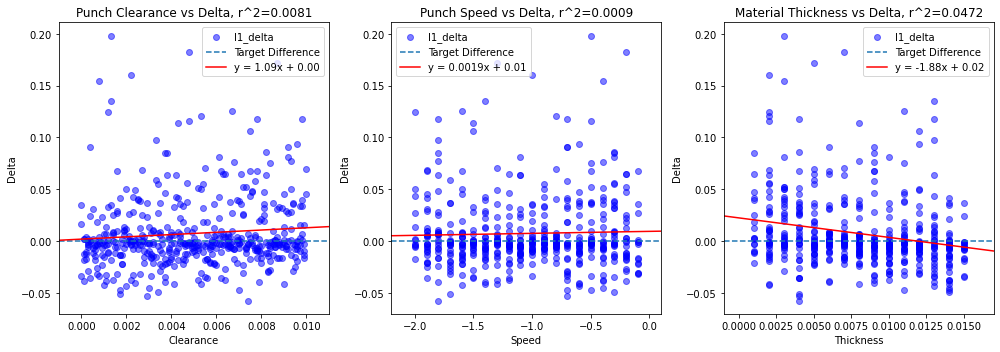

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

fig,ax = plt.subplots(1,3, figsize=(14,5))

ax[0].scatter(df['clearance'], df['l1_delta'], color='blue', alpha=0.5, label='l1_delta')
# ax[0].scatter(df['clearance'], df['l2_delta'], color='g', alpha=0.5, label='l2_delta')
ax[0].axhline(y=0, linestyle='--', label='Target Difference')
x = df['clearance']
y = df['l1_delta']
coeff = np.polyfit(x, y, 1)
reg = np.poly1d(coeff)
x_extended = np.linspace(df['clearance'].min() - 0.001, df['clearance'].max() + 0.001, 100)
y_pred = np.polyval(coeff, x)
r2_value = r2_score(y, y_pred)
ax[0].plot(x_extended, reg(x_extended), color='red', label=f'y = {coeff[0]:.2f}x + {coeff[1]:.2f}')
ax[0].set(title=f'Punch Clearance vs Delta, r^2={r2_value:.4f}', 
          xlabel='Clearance', ylabel='Delta',
          xlim=[x_extended.min(), x_extended.max()] #, ylim=[0.1, 0.275]
         )
ax[0].legend()

ax[1].scatter(df['speed'], df['l1_delta'], color='blue', alpha=0.5, label='l1_delta')
# ax[1].scatter(df['speed'], df['l2_delta'], color='g', alpha=0.5, label='l2_delta')
ax[1].axhline(y=0, linestyle='--', label='Target Difference')
x = df['speed']
y = df['l1_delta']
coeff = np.polyfit(x, y, 1)
reg = np.poly1d(coeff)
x_extended = np.linspace(x.min() - 0.2, x.max() + 0.2, 100)
y_pred = np.polyval(coeff, x)
r2_value = r2_score(y, y_pred)
ax[1].plot(x_extended, reg(x_extended), color='red', label=f'y = {coeff[0]:.4f}x + {coeff[1]:.2f}')
ax[1].set(title=f'Punch Speed vs Delta, r^2={r2_value:.4f}', 
          xlabel='Speed', ylabel='Delta',
          xlim=[x_extended.min(), x_extended.max()] #, ylim=[0.1, 0.275]
         )
ax[1].legend()

ax[2].scatter(df['thickness'], df['l1_delta'], color='blue', alpha=0.5, label='l1_delta')
# ax[2].scatter(df['thickness'], df['l2_delta'], color='g',alpha=0.5, label='l2_delta')
ax[2].axhline(y=0, linestyle='--', label='Target Difference')
x = df['thickness']
y = df['l1_delta']
coeff = np.polyfit(x, y, 1)
reg = np.poly1d(coeff)
x_extended = np.linspace(x.min() - 0.002, x.max() + 0.002, 100)
y_pred = np.polyval(coeff, x)
r2_value = r2_score(y, y_pred)
ax[2].plot(x_extended, reg(x_extended), color='red', label=f'y = {coeff[0]:.2f}x + {coeff[1]:.2f}')
ax[2].set(title=f'Material Thickness vs Delta, r^2={r2_value:.4f}', 
          xlabel='Thickness', ylabel='Delta', 
          xlim=[x_extended.min(), x_extended.max()] #, ylim=[0.1, 0.275]
         )
ax[2].legend()

plt.tight_layout()
plt.show()

In [18]:
# save as csv

response_df = df[['clearance','speed','thickness','x-distance']]
response_df = response_df.rename(columns={'x-distance':'response'})

current_directory = os.getcwd()
csv_file_path = './data/responses.csv'
csv_file_path = os.path.join(current_directory, csv_file_path)
response_df.to_csv(csv_file_path, index_label='sample_index')
print('Saved to: ' + csv_file_path)

Saved to: C:\Users\ags22007\OneDrive - University of Connecticut\Abaqus\Final\scripts\responses.csv
